# 'Likes' report 
## Gabriella Dugan - September 15, 2025

### Data Source
The data is NOT my personal data, for this project I downloaded the data given to me in the 'likes' report assignment since at the time of doing this assignment my personal Instagram account is deactivated. This is NOT my personal content & interactions and will NOT be shared anywhere. 
The source of Instagram data is Meta Platforms, Inc. 

### Purpose of Data
This data was created as a record of all activity on the Instagram platform. The purpose is conduct social interactions, personalize user experience & reflection, analyze behavior, target advertising, digital archiving.

### Data Reliability 
Data may be reliable as it is downloaded straight from Instagram servers, shows real interactive users have, recorded timestamps, comments, usernames, etc.. 

### Data Unreliability 
Data may be unreliable as there may be incomplete or deleted data, format misinterpretations, and lack of context of content.

### Import statements

In [ ]:
import json 
import pandas as pd

### Load JSON 

In [6]:
path = r'likes/liked_posts-1.json'
with open(path) as j:
    data = json.load(j)

### Explore Data

In [10]:
data.keys()

dict_keys(['likes_media_likes'])

In [21]:
data['likes_media_likes'][13]

{'title': 'kabirbhatiatime',
 'string_list_data': [{'href': 'https://www.instagram.com/p/DAUX-c9p_5K/',
   'value': 'ð\x9f\x91\x8d',
   'timestamp': 1727222908}]}

### Data to pandas dataframe

In [17]:

data_df = pd.DataFrame(data['likes_media_likes'])
data_df.head(14)


,title,string_list_data
0,philzphotos,[{'href': 'https://www.instagram.com/p/DNbPB16...
1,weave_n_wonder,[{'href': 'https://www.instagram.com/reel/DNp7...
2,weave_n_wonder,[{'href': 'https://www.instagram.com/reel/DNoJ...
3,philzphotos,[{'href': 'https://www.instagram.com/p/DNQjPMY...
4,weave_n_wonder,[{'href': 'https://www.instagram.com/p/DMiZKYt...
5,nidhigoels,[{'href': 'https://www.instagram.com/p/DJiamRA...
6,somosreedutt,[{'href': 'https://www.instagram.com/p/DJ7N-GJ...
7,philzphotos,[{'href': 'https://www.instagram.com/p/DJzVepW...
8,philzphotos,[{'href': 'https://www.instagram.com/p/DH9un-F...
9,philzphotos,[{'href': 'https://www.instagram.com/p/DHUig05...


### Tidy Data

In [28]:
data_df['like_timestamp'] = data_df['string_list_data'].apply(lambda x:x[0]['timestamp'])
data_df[['title', 'like_timestamp']].head(14)

,title,like_timestamp
0,philzphotos,1755861630
1,weave_n_wonder,1755861571
2,weave_n_wonder,1755861568
3,philzphotos,1755173316
4,weave_n_wonder,1753462673
5,nidhigoels,1748178260
6,somosreedutt,1748178257
7,philzphotos,1748178213
8,philzphotos,1744057150
9,philzphotos,1743338308


In [34]:
likes_by_account = data_df.groupby('title')['like_timestamp'].count()

likes_by_account = likes_by_account.reset_index().rename(columns={'like_timestamp': 'like_count'})
likes_by_account = likes_by_account.sort_values(by='like_count', ascending=False)

likes_by_account.head(14)


,title,like_count
3,philzphotos,6
6,weave_n_wonder,3
0,kabirbhatiatime,1
1,mauliksuchde,1
2,nidhigoels,1
4,somosreedutt,1
5,urjya.co,1


# Personal Facebook Hypothesis
I receive more Facebook messages from friends on the weekends than the weekdays.

### Theoretical Explanation
Typically on the weekends people usually have more free time and participate in social activites. This fits with the social interaction theory which proposes communications from peers tend to increase during leisure periods. 

### Statistical Explanation
This hypothesis can be measured by testing the timestamps of messages received in the Facebook message data. The dependant variable would be the Day Type (weekday vs weekend) The dependant variable would be the number of messages received.

### Json File
The your_in_app_messages_interactions.json will be useful as I think it will contain message content and timestamps of messages to test my hypothesis. 

### Import statements

In [26]:
import json
import pandas as pd 

### Load JSON

In [27]:
path = r'messages/your_in-app_messages_interactions.json'
with open(path) as j:
    data = json.load(j)

### Explore data

In [29]:
type(data)

list

In [33]:
print(type(data))       
print(len(data))        
print(type(data[0]))    
print(data[0].keys())   

<class 'list'>
9
<class 'dict'>
dict_keys(['timestamp', 'media', 'label_values', 'fbid'])


In [36]:
df = pd.DataFrame(data)
df.head()

,timestamp,media,label_values,fbid
0,1732766757,[],"[{'label': 'Message', 'value': 'In-app Message...",1105997544112022:100093100339566:pri
1,1732557630,[],"[{'label': 'Message', 'value': 'In-app Message...",1059482728430956:100093100339566:pri
2,1732557634,[],"[{'label': 'Message', 'value': 'In-app Message...",6379729178797653:100093100339566:pri
3,1757538175,[],"[{'label': 'Message', 'value': 'In-app Message...",1518680112159198:100093100339566:pri
4,1732557646,[],"[{'label': 'Message', 'value': 'In-app Message...",888284166283159:100093100339566:sec


In [45]:
df['datetime'] = pd.to_datetime(df['timestamp'], unit='s')

# Extract day of week (0=Monday, 6=Sunday)
df['day_of_week'] = df['datetime'].dt.dayofweek

# Optional: Create a 'weekday_or_weekend' column
df['day_type'] = df['day_of_week'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

df[['datetime', 'day_of_week', 'day_type']].head(10)

,datetime,day_of_week,day_type
0,2024-11-28 04:05:57,3,Weekday
1,2024-11-25 18:00:30,0,Weekday
2,2024-11-25 18:00:34,0,Weekday
3,2025-09-10 21:02:55,2,Weekday
4,2024-11-25 18:00:46,0,Weekday
5,2025-08-25 18:22:08,0,Weekday
6,2023-06-04 16:49:42,6,Weekend
7,2024-11-25 18:00:51,0,Weekday
8,2025-03-22 15:48:06,5,Weekend


In [49]:
message_counts = df['day_type'].value_counts()
print(message_counts)

day_type
Weekday    7
Weekend    2
Name: count, dtype: int64


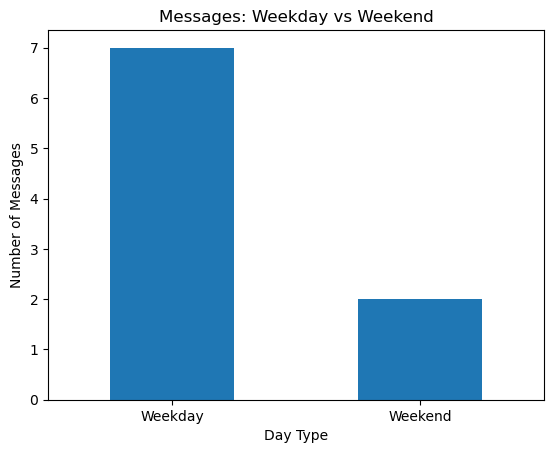

In [50]:
import matplotlib.pyplot as plt

message_counts.plot(kind='bar', title='Messages: Weekday vs Weekend')
plt.ylabel('Number of Messages')
plt.xlabel('Day Type')
plt.xticks(rotation=0)
plt.show()

# Interpretation

## Data Representation
The data above shows in-app Facebook message interactions.
Timestamp: Time when the message was received
Media: In this case empty but are any media attachments
Label_values: Type and value of the message data
Fbid: Facebook ID of the sender

## Tidy Principles
I think it mostly meets the principles, as rows and columns showed observation and variables.

## Testing Hypothesis
The data above can be used to test my hypothesis of 'I receive more Facebook messages from friends on the weekends than the weekdays.'

In this case, my hypothesis was wrong as I actually get more messages sent to me during the weekdays as compared to weekends.